## Image processing



1. Load images using torch vision
  - The ToTensor function transforms the picture into PyTorch tensor.
  - This is a 3D tensor, more precisley Tensor[channel, row, column]
    - channel: size 3 containing red, green, blue. Values are normalized to [0,1]
    - row: index of the pixel row in the image, in this case size 256
    - column: index of the pixel column in the image, in this case sie 256
2. present picture colors
- Matplotlib imshow function maps  the tensor back to RBG values
- Show function reads the pixels from the prepared tensor and displays them

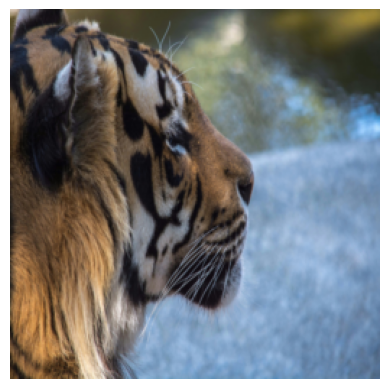

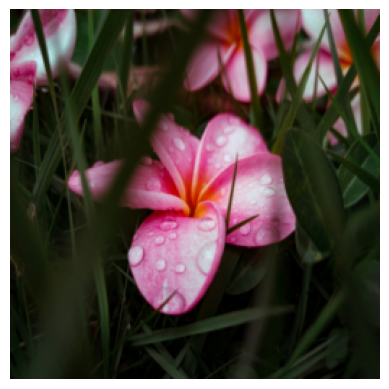

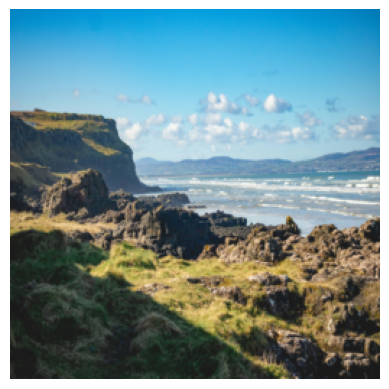

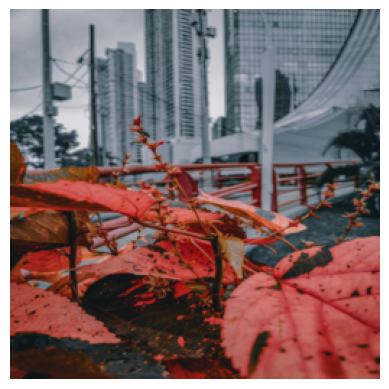

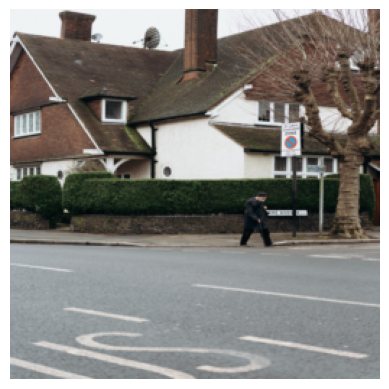

In [3]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load and transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
images = ["example1.jpg","example3.jpg","example2.jpg","example4.jpg","example.jpg"]
def display_images(images):
  for img in images:
    img = Image.open(img)
    img_tensor = transform(img)
    img_np = img_tensor.permute(1, 2, 0).numpy()
    plt.imshow(img_np)
    plt.axis("off")
    plt.show()

display_images(images)

3. Display historgrams
- First enumerate through the color chanel values:
  - Loop over each channel in the image tensor
- Convert the i-th channel from 2D to 1D
  - Each channel is a 2D array [H, W] of pixel intensities
  - Flatten it into 1D array so it can be used for the histogram
- Create subplots for the histograms:
 - setup 3 subplots for each channel
 - Plot the histogram of pixel intensities for the current channel

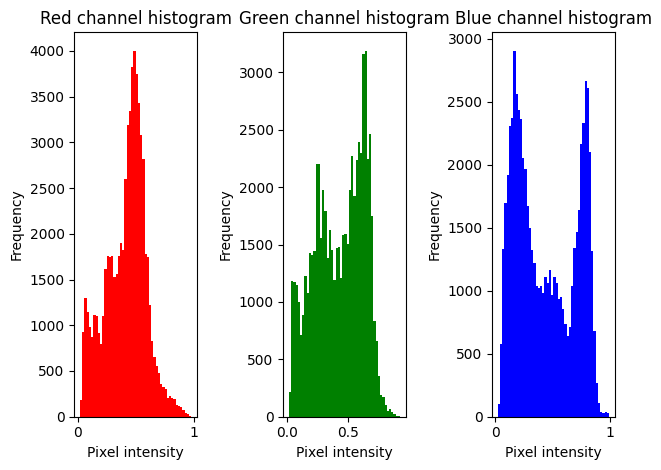

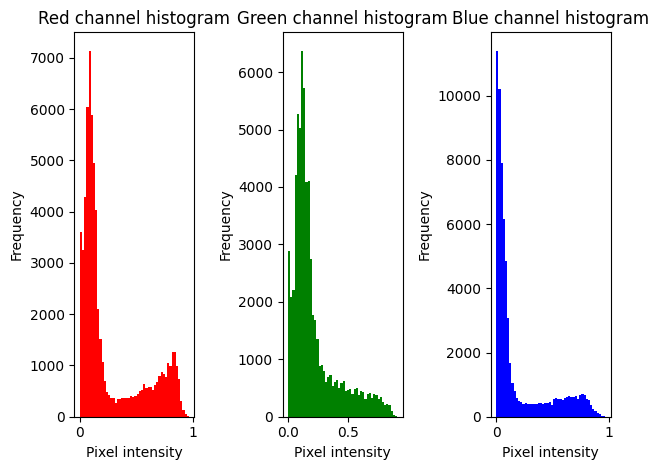

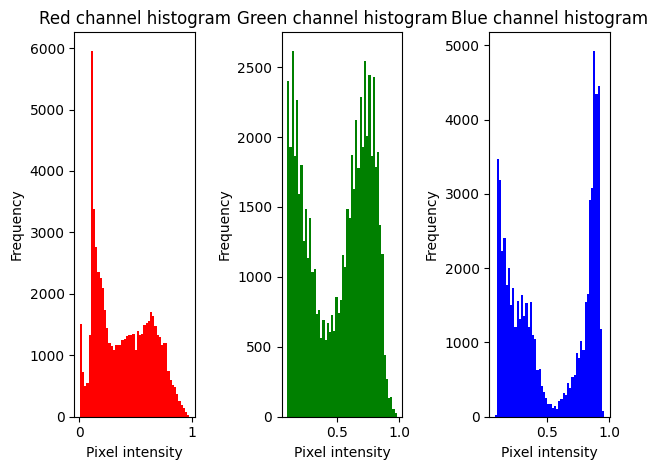

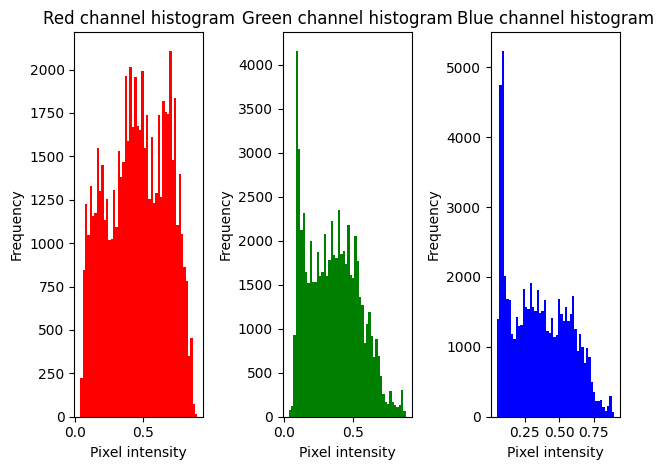

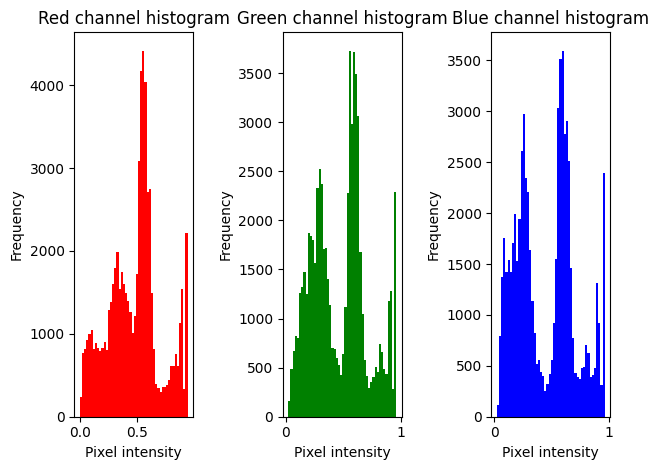

In [6]:
colors = ['red', 'green', 'blue']
channel_names = ['Red', 'Green', 'Blue']
def to_hist(image):

        for i, color in enumerate(colors):
            channel_data = img_tensor[i].flatten().numpy()
            plt.subplot(1, 3, i+1)
            plt.hist(channel_data, bins=50, color=color)
            plt.title(f"{channel_names[i]} channel histogram")
            plt.xlabel("Pixel intensity")
            plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()
for img in images:
  img = Image.open(img)
  img_tensor = transform(img)
  to_hist(img)

4. Calculate pixel avarages and mean for every picture.
- Using view function to flatten tensor into 1D array. Resulting shape: [3, H*W] → one row per channel, all pixel values in that row.
- Use mean() to get the mean of the pixels across all channels.  First dimension is the color channel therefore use dim=1 parameter.
- Compute the standard deviation per channel similarly.
5. Calculate normalization of the image.
- Subtract the mean from the every value of the image tensor and than divide them with the standard deviation
- Flatten it again to get a 1D array and check if normalization worked correctly

In [7]:
def normalize_image(img_tensor):
      means = img_tensor.view(3, -1).mean(dim=1)
      stds  = img_tensor.view(3, -1).std(dim=1)
      img_normalized = (img_tensor - means[:, None, None]) / stds[:, None, None]
      norm_means = img_normalized.view(3, -1).mean(dim=1)
      norm_stds  = img_normalized.view(3, -1).std(dim=1)

      original_stats = {
          "mean": means,
          "std": stds
      }

      normalized_stats = {
          "mean": norm_means,
          "std": norm_stds
      }

      return img_normalized, original_stats, normalized_stats

for img  in images:
    img = Image.open(img)
    img_tensor = transform(img)
    img_norm, orig_stats, norm_stats = normalize_image(img_tensor)
    for i, channel in enumerate(["Red", "Green", "Blue"]):
        print(f"{channel} - original mean: {orig_stats['mean'][i]:.4f}, std: {orig_stats['std'][i]:.4f}")
        print(f"{channel} - normalized mean: {norm_stats['mean'][i]:.4f}, std: {norm_stats['std'][i]:.4f}")
    print("-" * 40)

Red - original mean: 0.4185, std: 0.1738
Red - normalized mean: 0.0000, std: 1.0000
Green - original mean: 0.4318, std: 0.2002
Green - normalized mean: 0.0000, std: 1.0000
Blue - original mean: 0.4404, std: 0.2612
Blue - normalized mean: 0.0000, std: 1.0000
----------------------------------------
Red - original mean: 0.2686, std: 0.2803
Red - normalized mean: -0.0000, std: 1.0000
Green - original mean: 0.2118, std: 0.1918
Green - normalized mean: -0.0000, std: 1.0000
Blue - original mean: 0.1900, std: 0.2500
Blue - normalized mean: -0.0000, std: 1.0000
----------------------------------------
Red - original mean: 0.3864, std: 0.2438
Red - normalized mean: 0.0000, std: 1.0000
Green - original mean: 0.5104, std: 0.2517
Green - normalized mean: 0.0000, std: 1.0000
Blue - original mean: 0.5302, std: 0.3132
Blue - normalized mean: 0.0000, std: 1.0000
----------------------------------------
Red - original mean: 0.4583, std: 0.2156
Red - normalized mean: -0.0000, std: 1.0000
Green - origina

### Sound file processing
1. Use librosa.load to read the file.
 - y1,y2 are arrays, where each value represents the amplitude of the sound at a given time.
 - s1,s2: sampling rates(How many samples per second were recorded.)
 - sr =None: ensures that the original sampling rate is kept
 - STFT: divides the signal into short time windows and applies the Fourier transform to each window. Results in complex valued matrices containing the frequency bins and time frames.
 - amplitude_to_db: converts amplitudes to decibels for easier visualization.



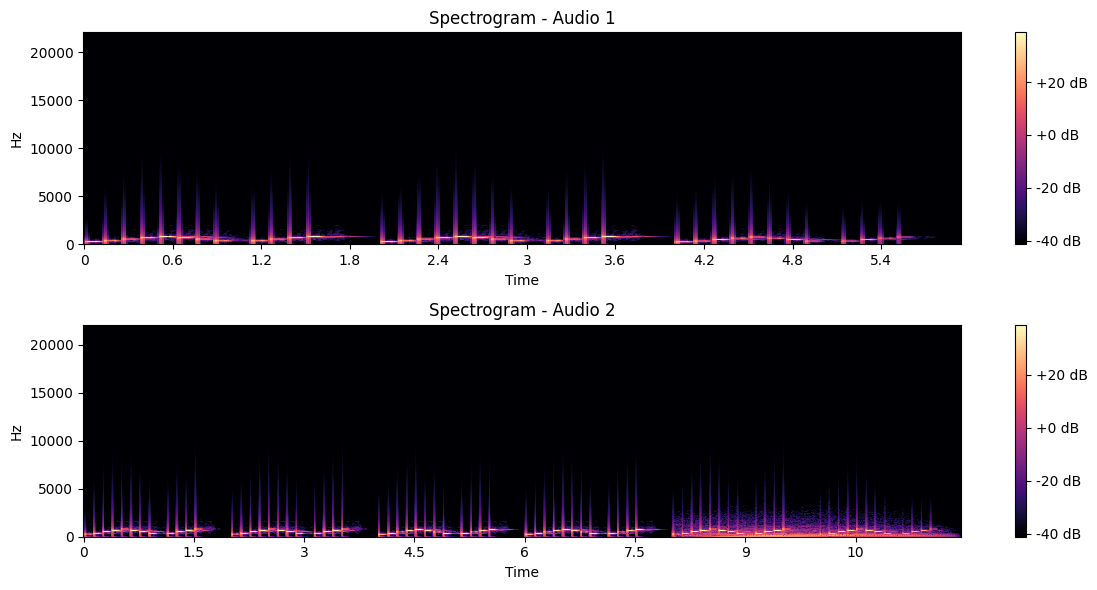

In [8]:
import librosa
import soundfile as sf
import numpy as np
import os


audio_file1 = "audio1.wav"
audio_file2 = "audio2.wav"
y1, sr1 = librosa.load(audio_file1, sr=None)
y2, sr2 = librosa.load(audio_file2, sr=None)
D1 = librosa.stft(y1)
D2 = librosa.stft(y2)
DB1 = librosa.amplitude_to_db(abs(D1))
DB2 = librosa.amplitude_to_db(abs(D2))
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(DB1, sr=sr1, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram - Audio 1")

plt.subplot(2, 1, 2)
librosa.display.specshow(DB2, sr=sr2, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram - Audio 2")

plt.tight_layout()
plt.show()

### Calculate mean and standard deviation for the audio:
- Subtract mean and divide by std to normalize the data.
- Check that the normalized spectrogram has mean 0 and std 1.

In [9]:
def normalize_spectrogram(DB):
    mean = DB.mean()
    std = DB.std()
    DB_norm = (DB - mean) / std
    return DB_norm, mean, std

DB1_norm, mean1, std1 = normalize_spectrogram(DB1)
DB2_norm, mean2, std2 = normalize_spectrogram(DB2)
print(f"Audio 1 - original mean: {mean1:.4f}, std: {std1:.4f}")
print(f"Audio 2 - original mean: {mean2:.4f}, std: {std2:.4f}")

print(f"Audio 1 - normalized mean: {DB1_norm.mean():.4f}, std: {DB1_norm.std():.4f}")
print(f"Audio 2 - normalized mean: {DB2_norm.mean():.4f}, std: {DB2_norm.std():.4f}")


Audio 1 - original mean: -39.6708, std: 7.0122
Audio 2 - original mean: -39.0732, std: 8.0975
Audio 1 - normalized mean: -0.0000, std: 1.0000
Audio 2 - normalized mean: -0.0000, std: 1.0000


## Process web url
- Use request.get to send HTTP GET request to the given url.
- response.text: get the content of the page as a string
- Use Beautiful soup get_text to remove html tags and join everything with spaces
- loop through every letter and count how many times they appear in the text

﻿ Deep Learning a gyakorlatban Python és LUA alapon - VITMAV45 | SmartLab, BME TMIT Languages Magyar English Menü be/kikapcsolás RÓLUNK Laborunkról Munkatársaink Média megjelenések MEGOLDÁSAINK Profivox magyar nyelvű felolvasó (korpuszos) Profivox magyar nyelvű felolvasó (DNN) Profivox magyar nyelvű felolvasó (HMM) Profivox magyar nyelvű felolvasó (diádos,triádos) StrokeAid Alkalmazások Jaws for Windows integráció Időjárás mindenkinek (magyar, Windows 8) AALFred (5 nyelven, Windows 8.1) Robobraille Beszélő ATM-ek Gyógyszervonal (OGYI) Árlista felolvasó (T-mobile) Keleti pályaudvar bemondórendszere Mindenség elmélete c. film gépi beszéd szinkron K+F Kutatási projektek (folyamatban) Kutatási projektek (befejezett) Publikációk (összes) Publikációk (kiemelt) Letölthető könyvek OKTATÁS KAPCSOLAT BLOG DEEP LEARNING A GYAKORLATBAN PYTHON ÉS LUA ALAPON Kezdőlap Oktatás Deep Learning Ha a tárgyról lecsúsztál, de szeretnél a deep learningbe belekezdeni, vagy már elvégezted a tárgyat és szeretnél

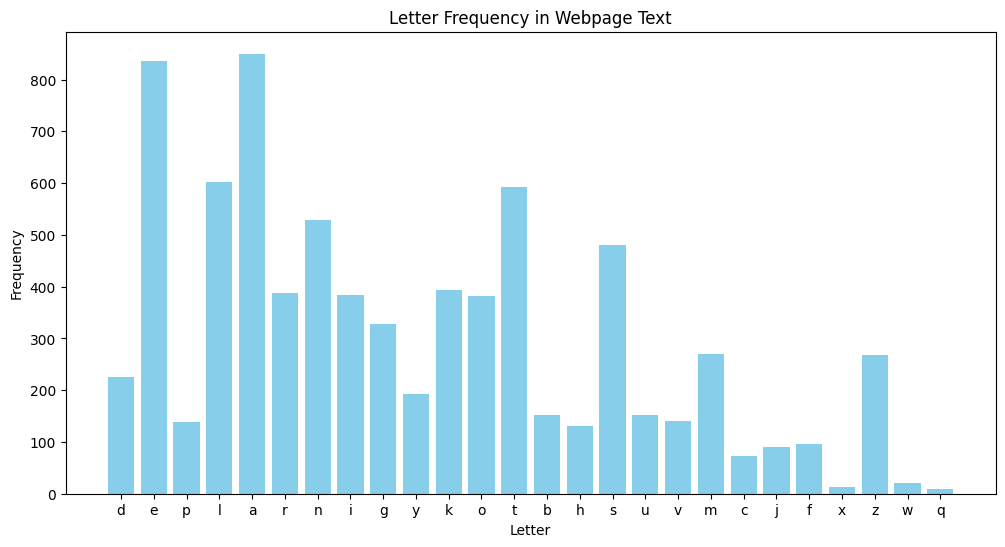

In [10]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter
import string
url = "http://smartlab.tmit.bme.hu/oktatas-deep-learning"
response = requests.get(url)
html_content = response.text
soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text(separator=" ", strip=True)
print(text[:1000])
text_lower = text.lower()
letters_only = [c for c in text_lower if c in string.ascii_lowercase]
counter = Counter(letters_only)
plt.figure(figsize=(12, 6))
plt.bar(counter.keys(), counter.values(), color='skyblue')
plt.xlabel("Letter")
plt.ylabel("Frequency")
plt.title("Letter Frequency in Webpage Text")
plt.show()
